In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
earnings_dates = pd.read_csv('data/eps_days.csv')

In [5]:
earnings_dates


,date,exchange,symbol,when,security_name,exchange_codes,next_trading_day,eps_day
0,2023-01-03,NASDAQ,LEDS,premarket,SemiLEDS Corporation - Common Stock,NASDAQ,2023-01-04,2023-01-03
1,2023-01-03,NASDAQ,SGH,postmarket,"SMART Global Holdings, Inc. - Ordinary Shares",NASDAQ,2023-01-04,2023-01-04
2,2023-01-04,NASDAQ,RGP,postmarket,"Resources Connection, Inc. - Common Stock",NASDAQ,2023-01-05,2023-01-05
3,2023-01-04,NASDAQ,SLP,postmarket,"Simulations Plus, Inc. - Common Stock",NASDAQ,2023-01-05,2023-01-05
4,2023-01-05,NYSE,CAG,NaN,"ConAgra Brands, Inc. Common Stock",XNYS,2023-01-06,2023-01-05
...,...,...,...,...,...,...,...,...
8781,2023-12-21,NYSE,KMX,premarket,CarMax Inc,XNYS,2023-12-22,2023-12-21
8782,2023-12-21,NASDAQ,LMNR,postmarket,Limoneira Co - Common Stock,NASDAQ,2023-12-22,2023-12-22
8783,2023-12-21,NYSE,NKE,NaN,"Nike, Inc. Common Stock",XNYS,2023-12-22,2023-12-21
8784,2023-12-21,NASDAQ,PAYX,premarket,"Paychex, Inc. - Common Stock",NASDAQ,2023-12-22,2023-12-21


In [13]:
straddles_df = pd.read_csv('straddle_data_cleaned.csv')
straddles_df

,Symbol,Name,Current Price,% Change,Avg Stock Volume,Avg Option Volume,Date,Implied Move,Actual Move,Straddle Return,Avg Straddle Return,Max Return,Min Return,EtfHoldingsList,MarketCap
0,EDSA,Edesa Biotech - Common Shares,4.8300,0.0343,80026,NaN,2/9/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.531485e+07
1,CTLT,Catalent,56.7100,0.0028,2497920,2186.0,2/9/2024,0.0397,0.0028,-0.4520,0.1496,0.5174,-0.3961,SPY - XLV,1.024417e+10
2,TMQ,Trilogy Metals,0.4722,-0.0284,217769,25.0,2/9/2024,0.0955,-0.0274,NaN,NaN,NaN,NaN,NaN,7.360834e+07
3,EVI,Evi Industries,22.3000,0.0529,18312,NaN,2/9/2024,NaN,0.0529,NaN,NaN,NaN,NaN,IWM,3.115856e+08
4,TIXT,Telus Intl,9.4000,0.0251,239807,166.0,2/9/2024,0.0809,0.0251,-0.2705,-0.1276,-0.0512,-0.2177,NaN,2.569881e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,MMLP,Martin Midstream Partners LP - Common Units Re...,2.2200,0.0091,60442,34.0,10/18/2023,0.0365,-0.0173,-0.2716,-0.1954,0.2308,-0.5000,NaN,8.639087e+07
2371,SCL,Stepan Company,90.2400,0.0026,103199,31.0,10/18/2023,0.0570,0.0618,0.0536,0.5240,1.5555,-0.1427,IWM,2.012948e+09
2372,CCEL,Cryo-Cell International,5.6000,0.0000,10364,NaN,10/12/2023,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,4.641512e+07
2373,NRIX,Nurix Therapeutics,8.8500,0.0267,688731,104.0,10/12/2023,0.0877,0.0225,-0.1347,0.1517,0.8077,-0.2377,IBB - IWM,4.292584e+08


<Axes: xlabel='Current Price', ylabel='% Change'>

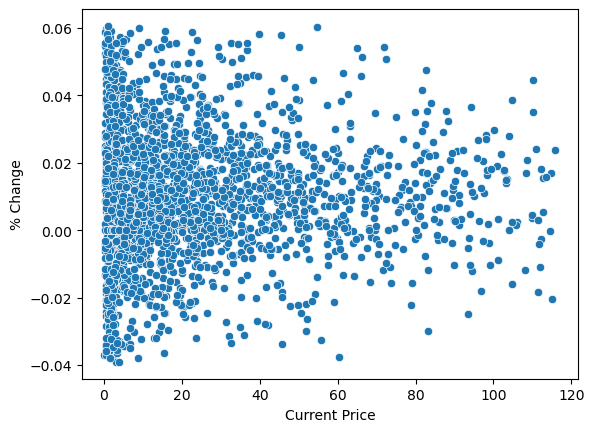

In [20]:
sns.scatterplot(x=straddles_df['Current Price'], y=straddles_df['% Change'])

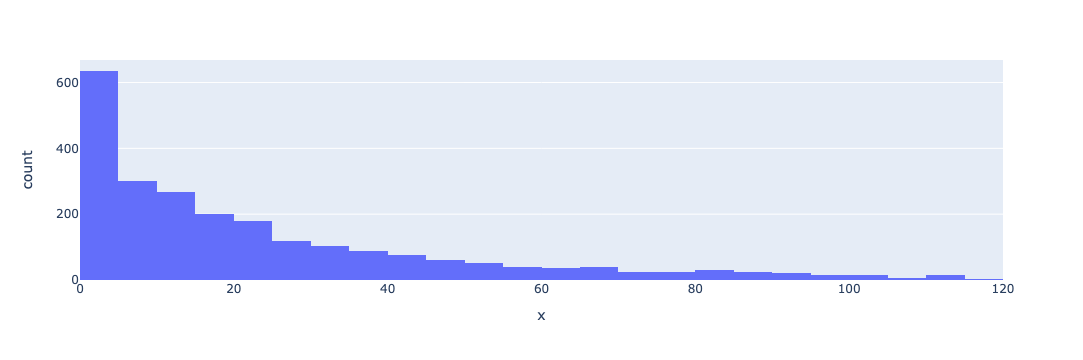

In [21]:
# Create histogram
fig = px.histogram(x=straddles_df['Current Price'])

# Show plot
fig.show()

# remove outliers

<Axes: >

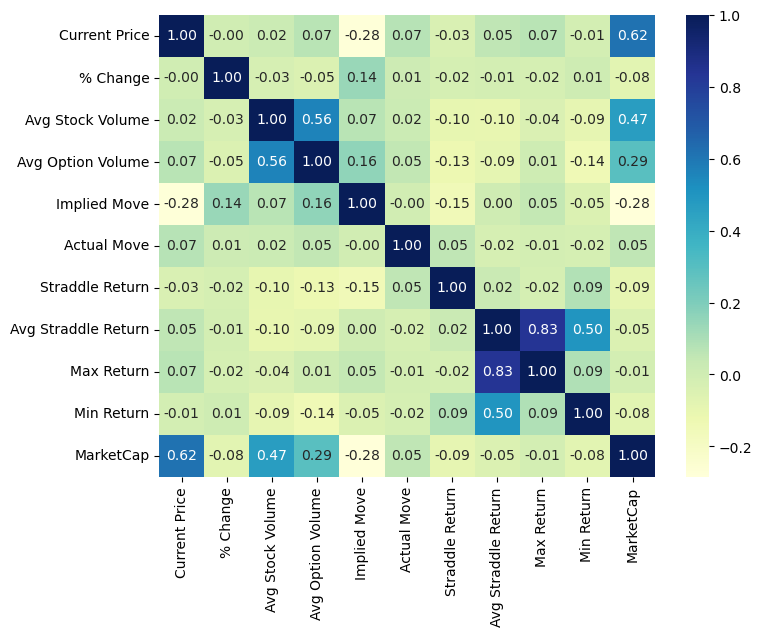

In [22]:
# corr matrix 

plt.figure(figsize=(8, 6))
corr_matrix = straddles_df.corr(numeric_only=True)

sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={'size': 10})

<Axes: >

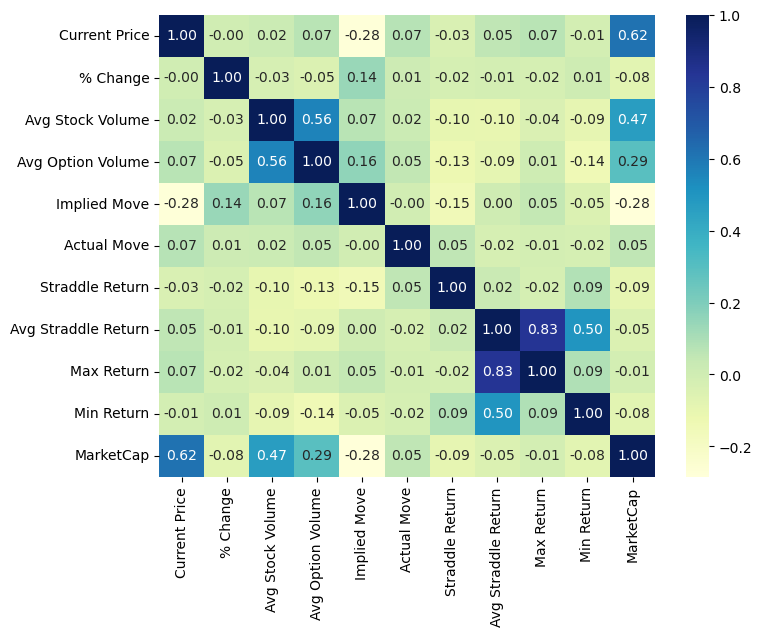

In [23]:
# corr matrix 

plt.figure(figsize=(8, 6))
corr_matrix = straddles_df.corr(numeric_only=True)

sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={'size': 10})


In [24]:
corr_matrix.sort_values(by='Min Return', ascending = False).head(5)

,Current Price,% Change,Avg Stock Volume,Avg Option Volume,Implied Move,Actual Move,Straddle Return,Avg Straddle Return,Max Return,Min Return,MarketCap
Min Return,-0.011103,0.010568,-0.092390,-0.139400,-0.047968,-0.020406,0.085453,0.498441,0.088988,1.000000,-0.075329
Avg Straddle Return,0.054433,-0.009146,-0.102515,-0.087568,0.003326,-0.024545,0.022223,1.000000,0.834682,0.498441,-0.045427
Max Return,0.066902,-0.021144,-0.041263,0.007258,0.045560,-0.009216,-0.020498,0.834682,1.000000,0.088988,-0.011845
Straddle Return,-0.034480,-0.020137,-0.096914,-0.127957,-0.149376,0.054473,1.000000,0.022223,-0.020498,0.085453,-0.092966
% Change,-0.001906,1.000000,-0.028796,-0.047316,0.140783,0.011919,-0.020137,-0.009146,-0.021144,0.010568,-0.075043


Best correlations: 

* Max Return + Avg Straddle Return - 0.834682
* Min Return + Avg Straddle Return - 0.498441	
* Market Cap + Current Price  - 0.617676
* Market Cap + Avg Stock Volume - 0.466783
* Market Cap + Avg Option Volume - 0.292957
* Market Cap + Implied Move - -0.284778 (strongest neg corr)




In [25]:
straddles_df.columns

Index(['Symbol', 'Name', 'Current Price', '% Change', 'Avg Stock Volume',
       'Avg Option Volume', 'Date', 'Implied Move', 'Actual Move',
       'Straddle Return', 'Avg Straddle Return', 'Max Return', 'Min Return',
       'EtfHoldingsList', 'MarketCap'],
      dtype='object')

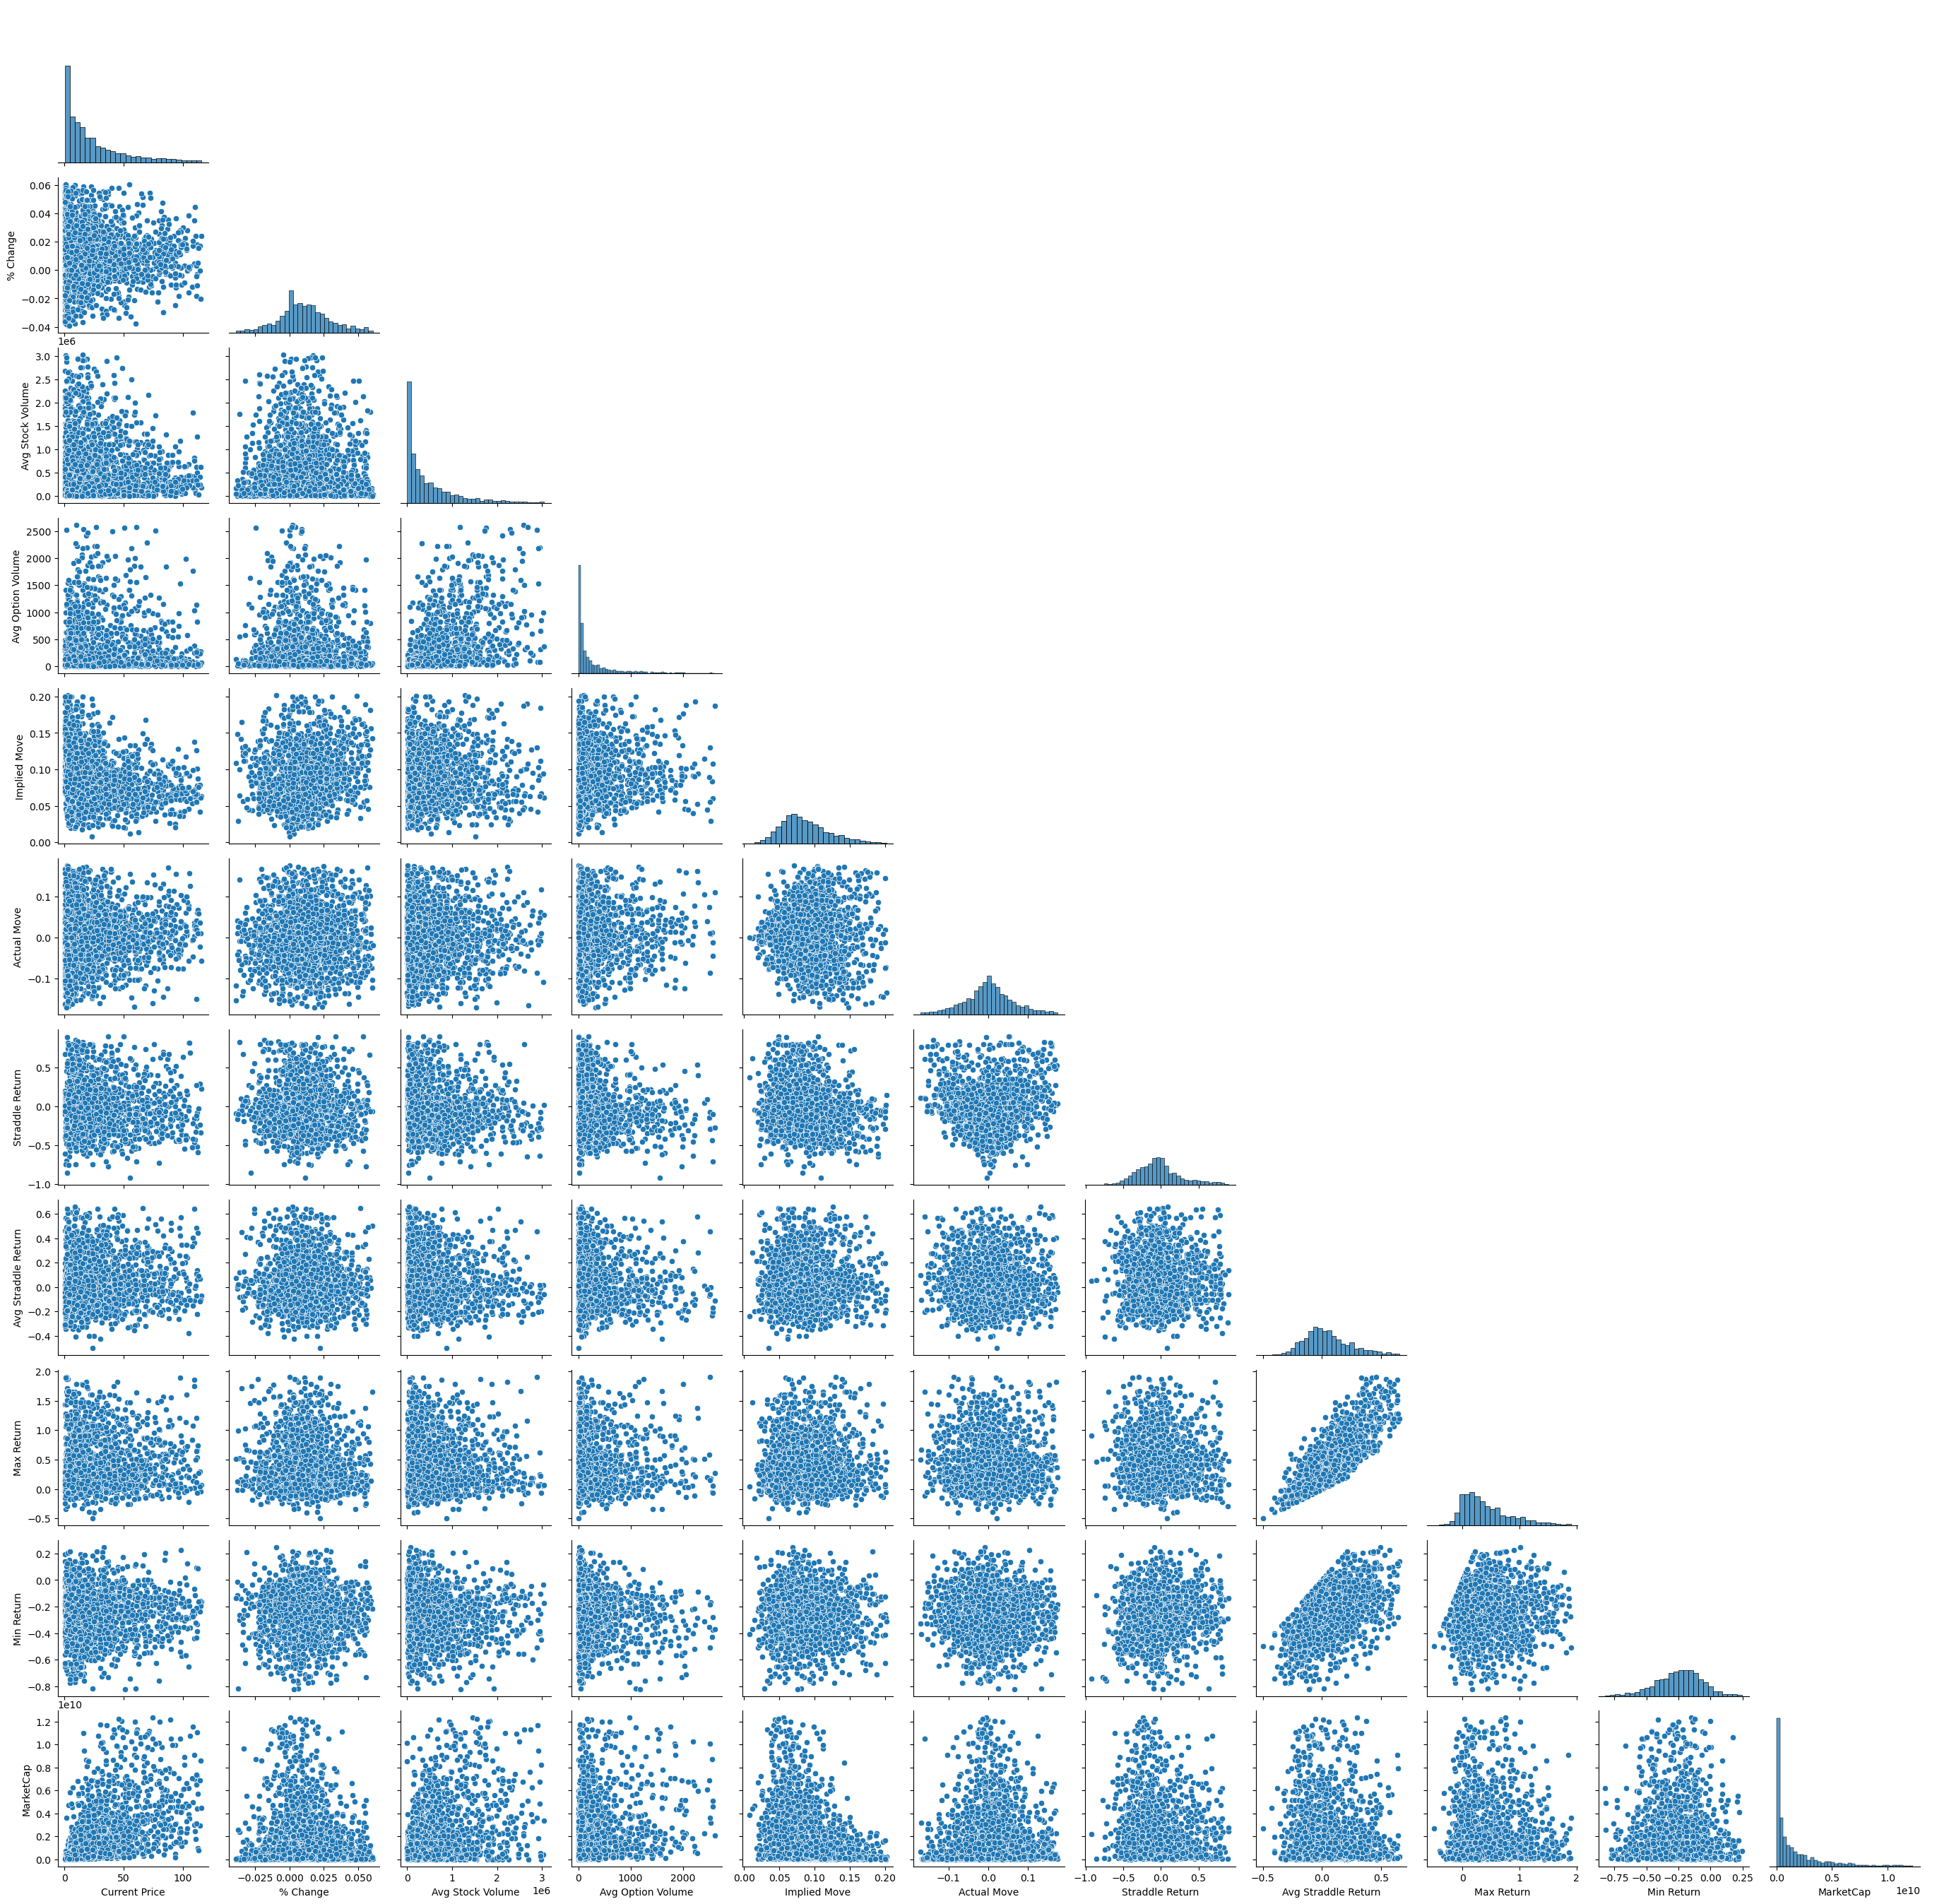

In [26]:
g = sns.PairGrid(straddles_df[['Current Price', '% Change', 'Avg Stock Volume',
       'Avg Option Volume', 'Date', 'Implied Move', 'Actual Move',
       'Straddle Return', 'Avg Straddle Return', 'Max Return', 'Min Return', 'MarketCap']],corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

<Axes: xlabel='Max Return', ylabel='Avg Straddle Return'>

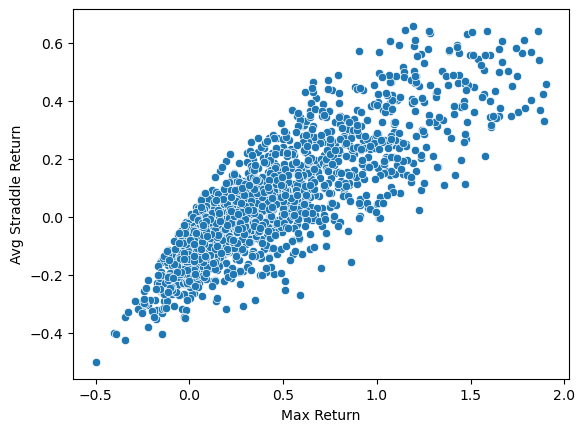

In [27]:
sns.scatterplot(x=straddles_df['Max Return'], y = straddles_df['Avg Straddle Return'])

<Axes: xlabel='MarketCap', ylabel='Current Price'>

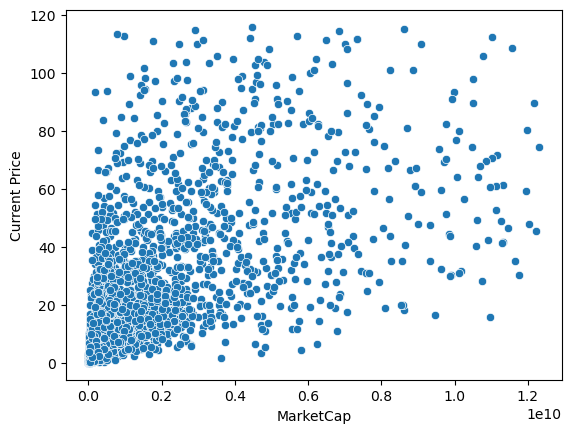

In [28]:
sns.scatterplot(x=straddles_df['MarketCap'], y = straddles_df['Current Price'])

### EDA

#### Earnings per share vs share price scatter plot